In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import re
from functools import reduce
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [2]:
datatype="ATAC"
y_ax = "ATAC signal"
input_dir = Path(r'C:\Users\libin\UCSF\MECP2\compare_element\1206_new_element_set\{}'.format(datatype))
file_paths = input_dir.glob('**/*.tab')
file_path_list = [str(path) for path in file_paths]
print (file_path_list)

['C:\\Users\\libin\\UCSF\\MECP2\\compare_element\\1206_new_element_set\\ATAC\\total_negative_elements_score_per_element_ATAC_original.tab', 'C:\\Users\\libin\\UCSF\\MECP2\\compare_element\\1206_new_element_set\\ATAC\\total_positive_elements_score_per_element_ATAC_original.tab']


In [6]:
df_list = []
for file in file_path_list:
    file_name = file.split("\\")[-1]
    basename = "".join(re.findall(r'total_(.+)_score', file_name))
    dataframe = pd.read_csv(file, sep="\t", skiprows=1, names=["chr", "start", "end", "{}".format(basename)])
    print (dataframe.head())
    print (basename)
    #print ("number of elements:", dataframe.shape[0])
    df_list.append(dataframe)

    chr     start       end  negative_elements
0  chr2  46464581  46464767           1.104129
1  chr2  46499814  46500475           1.075793
2  chr2  46580325  46580702           0.658185
3  chr2  46650618  46650735           0.746436
4  chr2  46704710  46704964           0.848657
negative_elements
    chr     start       end  positive_elements
0  chr2  46541698  46544265           0.935809
1  chr2  46555010  46555374           0.684692
2  chr2  46616497  46617342           1.561434
3  chr2  46698689  46699696           2.795598
4  chr2  46915464  46916202           1.783451
positive_elements


In [5]:
df_gr1 = reduce(lambda x, y: pd.merge(x, y, on = ["chr", "start", "end"], how="outer"), df_list)
# df_gr1 = reduce(lambda x, y: pd.merge(x, y, on = ["chr", "start", "end"], how="outer"), [df_list[0], df_list[1]])
print (list(df_gr1))
print(df_gr1.head())
#df_gr1 = df_gr1.rename(columns={"#1-1_i_240_p0.01_fcfdr0.05_2sg_elements": "1-1_i_240", "#1-2_i_160_2sg_elements_specific": "1-2_i_160", "#1-3_i_negative_elements": "1-3_i_negative"}, errors="raise")
print (df_gr1[['positive_elements', 'negative_elements']].describe())
df_gr1_melt = pd.melt(df_gr1, value_vars=['positive_elements', 'negative_elements'], value_name=y_ax, var_name="")

stats.ks_2samp(df_gr1["negative_elements"], df_gr1["positive_elements"])

['chr', 'start', 'end', 'negative_elements', 'positive_elements']
    chr     start       end  negative_elements  positive_elements
0  chr2  46464581  46464767           1.104129                NaN
1  chr2  46499814  46500475           1.075793                NaN
2  chr2  46580325  46580702           0.658185                NaN
3  chr2  46650618  46650735           0.746436                NaN
4  chr2  46704710  46704964           0.848657                NaN
       positive_elements  negative_elements
count          92.000000         209.000000
mean            1.108657           0.734938
std             0.533169           0.304574
min             0.350255           0.353789
25%             0.699806           0.543412
50%             1.014100           0.633852
75%             1.311224           0.857766
max             2.795598           2.176454


Ks_2sampResult(statistic=0.46179401993355484, pvalue=6.835039366792459e-29)

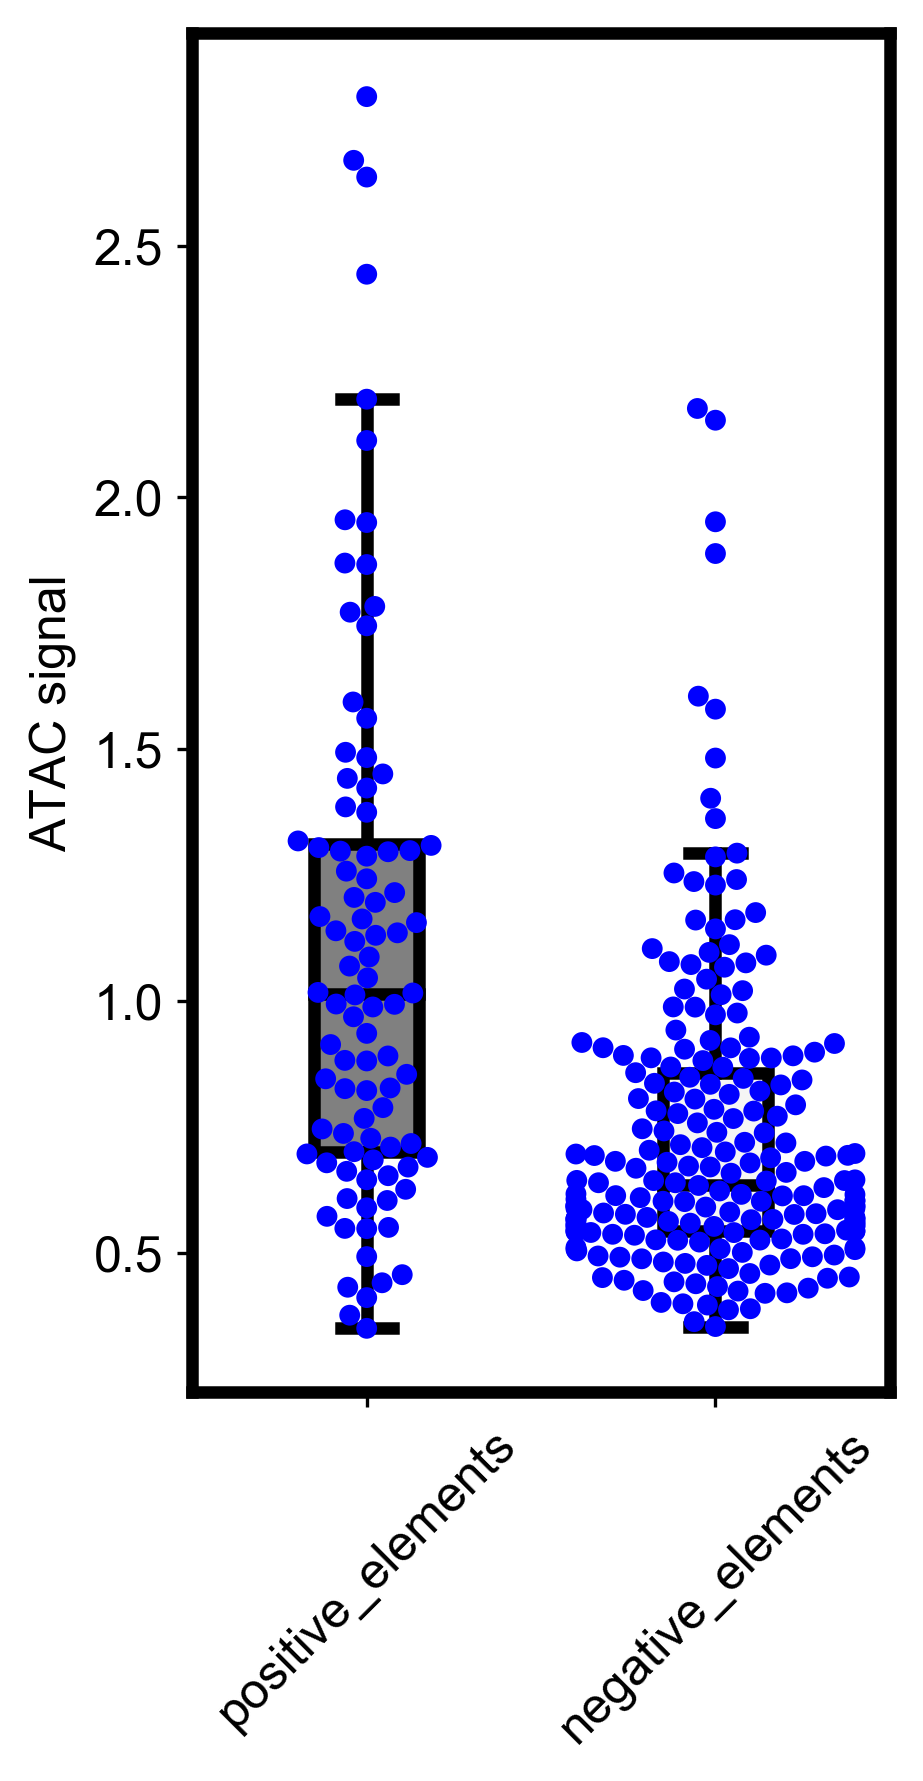

In [6]:
ax = plt.figure(figsize=(3,6))
plt.ylabel('', fontsize=12,fontname="Arial")
plt.xticks(rotation=45, fontname="Arial", fontsize=12)
plt.yticks(fontname="Arial", fontsize=12)
# sns.swarmplot(x="", y=y_ax, data=df_gr1_melt, color="blue", size=5, zorder=0)
ax=sns.boxplot(x="", y=y_ax, data=df_gr1_melt, palette=["gray", "whitesmoke"], showfliers = False, width=[0.3], boxprops=dict(edgecolor='black',linewidth=3))
plt.setp(ax.lines, color="black", linewidth=3)
plt.setp(ax.spines.values(), color="black", linewidth=3)
sns.swarmplot(x="", y=y_ax, data=df_gr1_melt, color="blue", size=5)

plt.savefig(r'C:/Users/libin/UCSF/MECP2/compare_element/{}_36_1107.pdf'.format(datatype), transparent=True)   

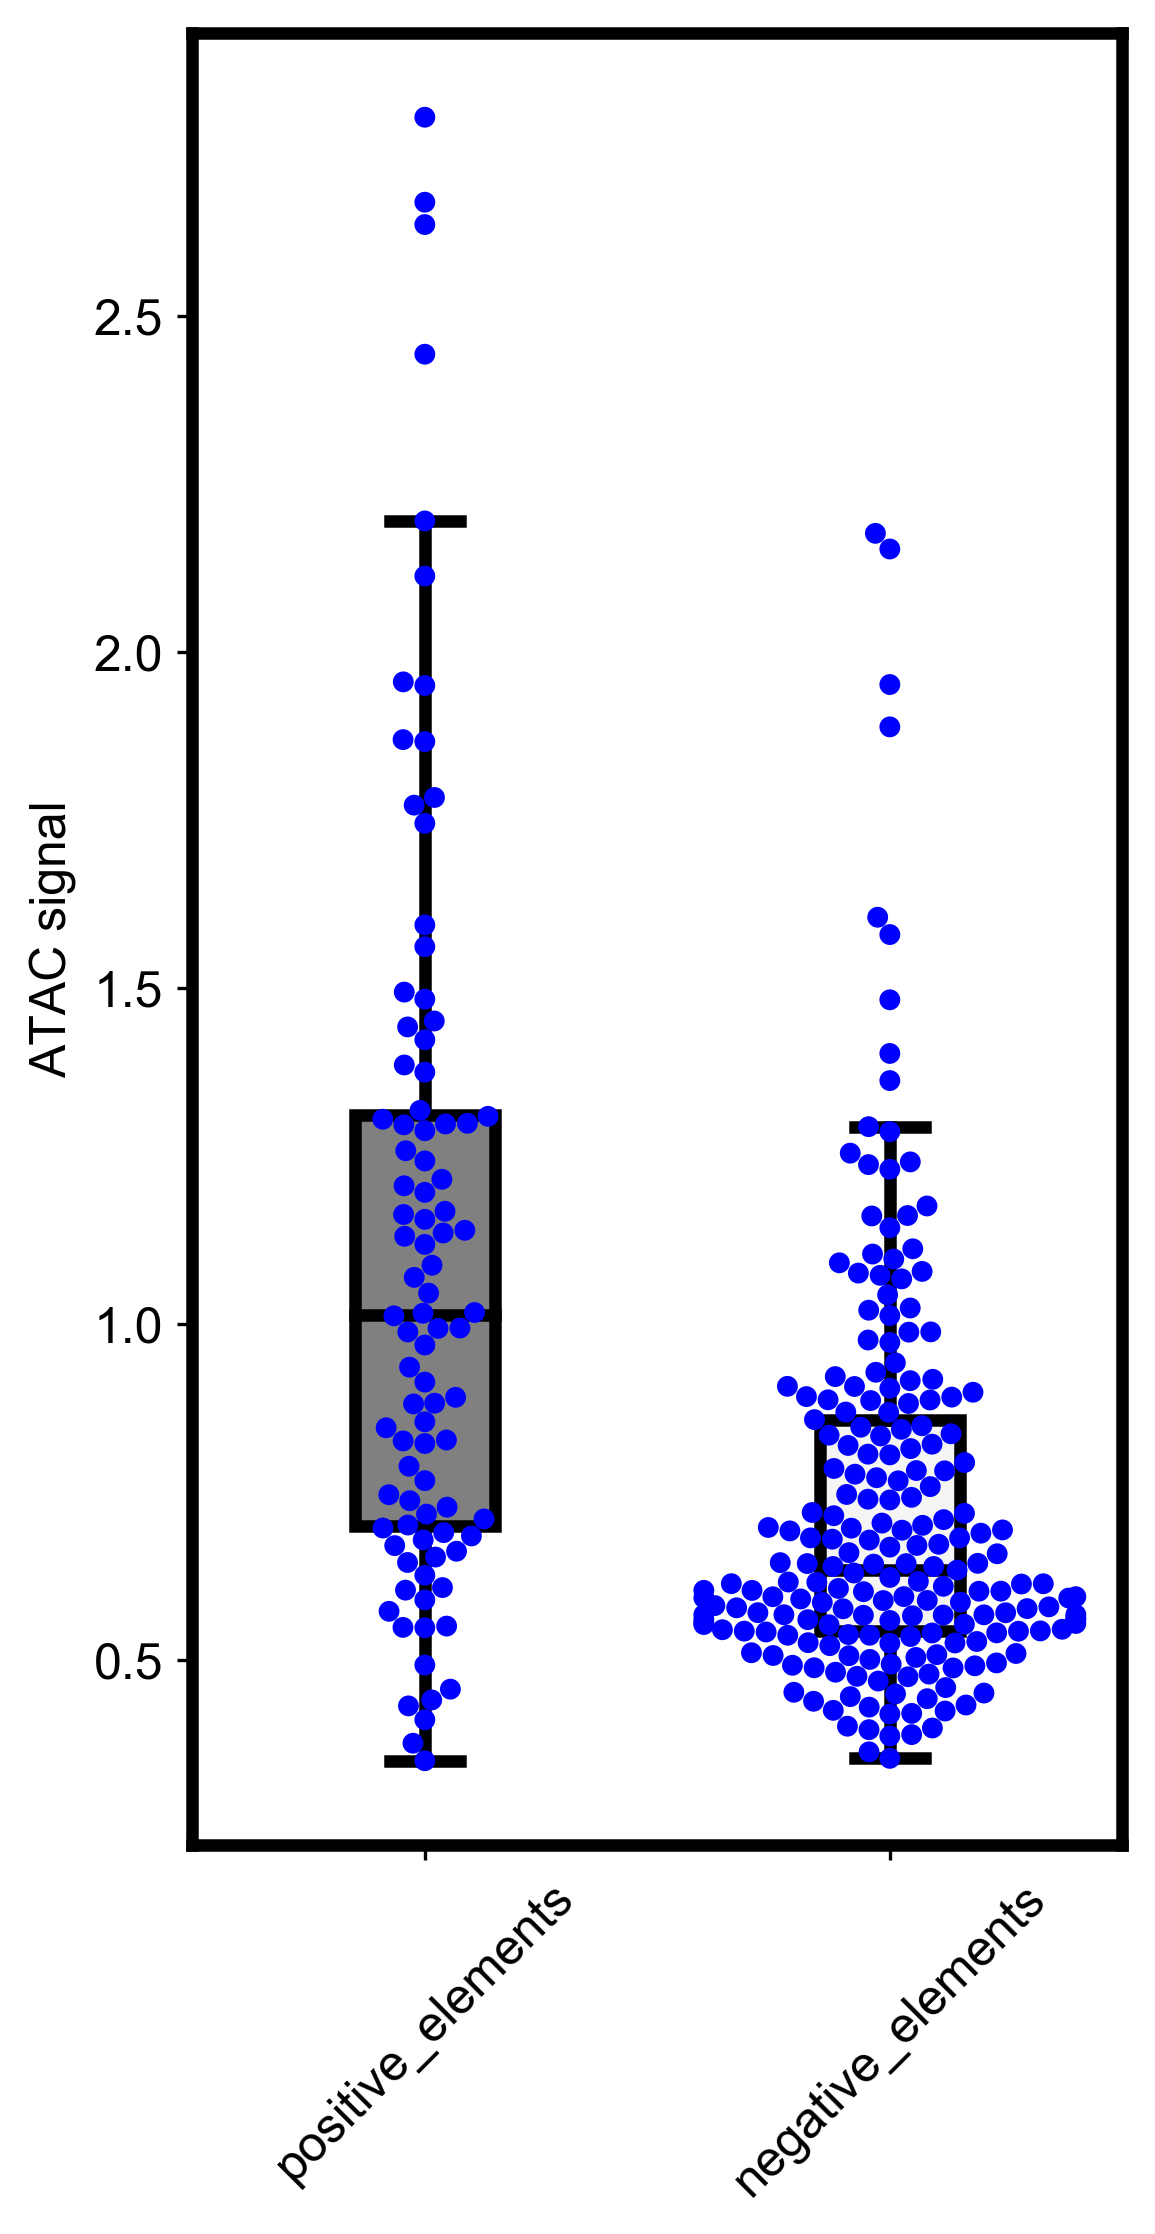

In [7]:
ax = plt.figure(figsize=(4,8))
plt.ylabel('', fontsize=12,fontname="Arial")
plt.xticks(rotation=45, fontname="Arial", fontsize=12)
plt.yticks(fontname="Arial", fontsize=12)
ax=sns.boxplot(x="", y=y_ax, data=df_gr1_melt, palette=["gray", "whitesmoke"], showfliers = False, width=[0.3], boxprops=dict(edgecolor='black',linewidth=3))
plt.setp(ax.lines, color="black", linewidth=3)
plt.setp(ax.spines.values(), color="black", linewidth=3)

sns.swarmplot(x="", y=y_ax, data=df_gr1_melt, color="blue", size=5)
plt.savefig(r'C:/Users/libin/UCSF/MECP2/compare_element/{}_48_1107.pdf'.format(datatype), transparent=True)   